<a href="https://colab.research.google.com/github/theaok/gisPy/blob/main/geoda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install mapclassify

In [2]:
import os, zipfile

import pandas as pd
import geopandas as gpd

import mapclassify

import matplotlib.pyplot as plt #vis

import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter()

### usual thematic maps

In [3]:
!wget -q -O columbus.zip https://geodacenter.github.io/data-and-lab/data/columbus.zip
zip_ref = zipfile.ZipFile('columbus.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
!ls columbus
col=gpd.read_file('columbus/columbus.shp')
#col.set_index('POLYID',inplace=True, drop=True,verify_integrity=True) #BUG [before 2024 at least] gets wieght creation messed up :(
#col.dtypes
col=col.drop(['AREA','PERIMETER','NSA','NSB','EW','CP'],axis=1)
#col.head(2)

columbus.csv  columbus.geojson	columbus.kml  columbus.prj  columbus.sqlite
columbus.dbf  columbus.gpkg	columbus.mid  columbus.shp  columbus.xlsx
columbus.gdb  columbus.html	columbus.mif  columbus.shx


In [4]:
colP = col.copy()
colP["geometry"] = colP["geometry"].centroid

/tmp/ipython-input-1180450006.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  colP["geometry"] = colP["geometry"].centroid


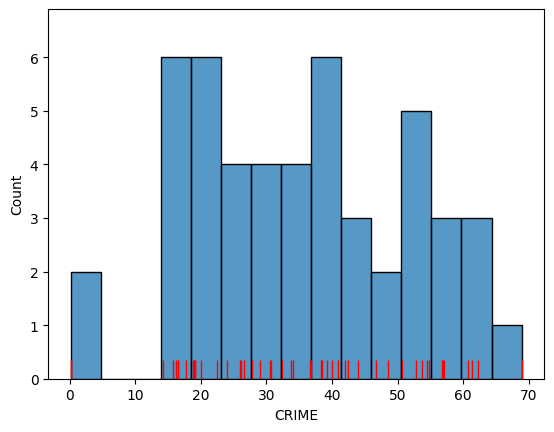

In [5]:
#col.CRIME.hist()
ax = sns.histplot(col["CRIME"], bins=15)
sns.rugplot(col["CRIME"], height=0.05, color="red", ax=ax);

Text(8.827218469203908, 14.369076018912063, '0')

Text(8.332658372724923, 14.031624006323966, '1')

Text(9.0122654093717, 13.819719079969147, '2')

Text(8.460800893307436, 13.716962170228141, '3')

Text(9.007982127497685, 13.296366430537292, '4')

Text(9.739925828001203, 13.474632743210716, '5')

Text(8.118750060628729, 13.295703867053538, '6')

Text(8.496488171957548, 13.402612361972409, '7')

Text(9.630793442508981, 12.942724931765364, '8')

Text(10.366382709801057, 13.00188936025309, '9')

Text(8.669735412857046, 12.98012156123324, '10')

Text(8.544995589641779, 12.9531256839822, '11')

Text(8.349223482851055, 12.996094141102331, '12')

Text(8.292701516920957, 12.863707688216895, '13')

Text(8.973462206070094, 12.741586740380376, '14')

Text(8.655866335560422, 12.62731580875412, '15')

Text(10.528621192777077, 12.647475597059021, '16')

Text(8.487918125725194, 12.545342471590063, '17')

Text(8.312367703365632, 12.666720813263051, '18')

Text(10.190581526179413, 12.256899149288648, '19')

Text(7.847423618980444, 12.084997322022751, '20')

Text(9.655244367498366, 12.462765864102984, '21')

Text(10.671381108158549, 12.291571317666135, '22')

Text(8.420744068273082, 12.318013434287653, '23')

Text(8.938751825549426, 12.380509826386751, '24')

Text(9.250921130765516, 12.413783516339139, '25')

Text(9.737004148455055, 12.149692840219398, '26')

Text(9.297975780128176, 11.977787924704433, '27')

Text(8.977861502440566, 11.994012072407754, '28')

Text(8.68871949319255, 11.938718355531323, '29')

Text(6.8924823259937416, 11.914150957988443, '30')

Text(10.76378352110245, 11.844431047650396, '31')

Text(9.783876039871148, 11.922708164579584, '32')

Text(7.33943071762272, 11.628545121558876, '33')

Text(9.668248963690393, 11.692541207168867, '34')

Text(6.728837547719331, 11.634364976122036, '35')

Text(8.912362855719714, 11.630310543083501, '36')

Text(9.210527335403754, 11.659838850006437, '37')

Text(6.221942933898136, 11.402513578924117, '38')

Text(10.492492572016708, 11.507197282569432, '39')

Text(10.95358743637645, 11.479245868637376, '40')

Text(7.1100509053908985, 11.295438892865233, '41')

Text(9.214330280393483, 11.432771789368283, '42')

Text(9.641904437882928, 11.391036212262494, '43')

Text(8.910340473827835, 11.148639078569653, '44')

Text(6.423385031583336, 11.219238093398321, '45')

Text(10.935302271773978, 11.010030663664562, '46')

Text(9.251957402833792, 11.181253873699427, '47')

Text(9.492143530360028, 11.014961106511862, '48')

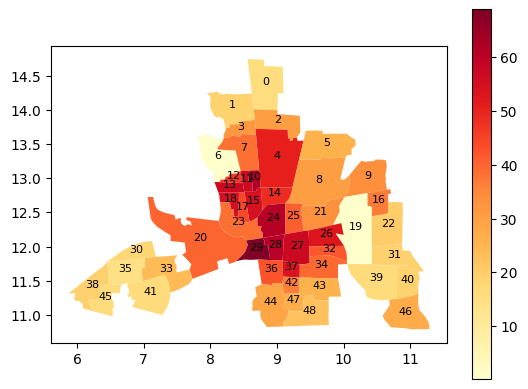

In [6]:
ax=col.plot(column='CRIME',legend=True,cmap='YlOrRd') #,scheme='quantiles',k=5
for x, y, label in zip(colP.geometry.x, colP.geometry.y, colP.index):
    ax.annotate(label, xy=(x, y),horizontalalignment='center', fontsize=8) #ytext=(3, 3), textcoords="offset points"
#note be careful: double triple check, may be sometimes off depending on sorting, esp if not sorted on index: https://colab.research.google.com/github/theaok/vis/blob/main/all.ipynb#scrollTo=VVNjIKa67tJt

Text(8.827218469203908, 14.369076018912063, '0')

Text(8.332658372724923, 14.031624006323966, '1')

Text(9.0122654093717, 13.819719079969147, '2')

Text(8.460800893307436, 13.716962170228141, '3')

Text(9.007982127497685, 13.296366430537292, '4')

Text(9.739925828001203, 13.474632743210716, '5')

Text(8.118750060628729, 13.295703867053538, '6')

Text(8.496488171957548, 13.402612361972409, '7')

Text(9.630793442508981, 12.942724931765364, '8')

Text(10.366382709801057, 13.00188936025309, '9')

Text(8.669735412857046, 12.98012156123324, '10')

Text(8.544995589641779, 12.9531256839822, '11')

Text(8.349223482851055, 12.996094141102331, '12')

Text(8.292701516920957, 12.863707688216895, '13')

Text(8.973462206070094, 12.741586740380376, '14')

Text(8.655866335560422, 12.62731580875412, '15')

Text(10.528621192777077, 12.647475597059021, '16')

Text(8.487918125725194, 12.545342471590063, '17')

Text(8.312367703365632, 12.666720813263051, '18')

Text(10.190581526179413, 12.256899149288648, '19')

Text(7.847423618980444, 12.084997322022751, '20')

Text(9.655244367498366, 12.462765864102984, '21')

Text(10.671381108158549, 12.291571317666135, '22')

Text(8.420744068273082, 12.318013434287653, '23')

Text(8.938751825549426, 12.380509826386751, '24')

Text(9.250921130765516, 12.413783516339139, '25')

Text(9.737004148455055, 12.149692840219398, '26')

Text(9.297975780128176, 11.977787924704433, '27')

Text(8.977861502440566, 11.994012072407754, '28')

Text(8.68871949319255, 11.938718355531323, '29')

Text(6.8924823259937416, 11.914150957988443, '30')

Text(10.76378352110245, 11.844431047650396, '31')

Text(9.783876039871148, 11.922708164579584, '32')

Text(7.33943071762272, 11.628545121558876, '33')

Text(9.668248963690393, 11.692541207168867, '34')

Text(6.728837547719331, 11.634364976122036, '35')

Text(8.912362855719714, 11.630310543083501, '36')

Text(9.210527335403754, 11.659838850006437, '37')

Text(6.221942933898136, 11.402513578924117, '38')

Text(10.492492572016708, 11.507197282569432, '39')

Text(10.95358743637645, 11.479245868637376, '40')

Text(7.1100509053908985, 11.295438892865233, '41')

Text(9.214330280393483, 11.432771789368283, '42')

Text(9.641904437882928, 11.391036212262494, '43')

Text(8.910340473827835, 11.148639078569653, '44')

Text(6.423385031583336, 11.219238093398321, '45')

Text(10.935302271773978, 11.010030663664562, '46')

Text(9.251957402833792, 11.181253873699427, '47')

Text(9.492143530360028, 11.014961106511862, '48')

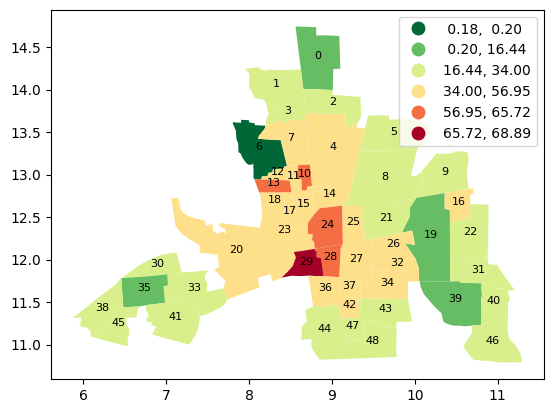

In [7]:
#focus on extremes and outliers; do note narrow bins at extremes!
ax=col.plot(column='CRIME',legend=True,scheme='percentiles',cmap='RdYlGn_r' )
for x, y, label in zip(colP.geometry.x, colP.geometry.y, colP.index):
    ax.annotate(label, xy=(x, y),horizontalalignment='center', fontsize=8) #ytext=(3, 3), textcoords="offset points"

In [ ]:
#import plotly.express as px
#px.scatter(col, x="CRIME", y="HOVAL",
#                  hover_data=[col.index],width=1000,height=600)

In [ ]:
#col.head(2)

### pysal / esda

following
https://martinfleischmann.net/sds/micro/autocorrelation/hands_on.html

maybe also see:

https://geographicdata.science/book a good general reference

https://geographicdata.science/book/notebooks/06_spatial_autocorrelation.html

https://geographicdata.science/book/notebooks/07_local_autocorrelation.html

https://pysal.org/esda/notebooks/spatialautocorrelation.html

https://kazumatsuda.medium.com/exploratory-spatial-data-analysis-esda-spatial-autocorrelation-71b5782c19d6

In [8]:
%%capture
!pip install libpysal
!pip install esda

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

import esda
from libpysal import graph

In [ ]:
#import pyproj
#col.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)
#px.choropleth(col, color="CRIME",locations=col.index, geojson=col.geometry
#                   )

#doesnt work projection problem; maps in africa
#col.explore(
#    col.CRIME,
#    cmap="coolwarm",
#    #prefer_canvas=True,
#    tiles="CartoDB Positron"
#)
#col.crs #looks like already should be in 4326
#cc = col.to_crs(epsg=4326) #and reprojecting doesnt fix it

In [10]:
contiguity = graph.Graph.build_contiguity(col, rook=False)

In [11]:
contiguity[0]

,weight
neighbor,
1,1
2,1


In [12]:
contiguity[1]

,weight
neighbor,
0,1
2,1
3,1


In [13]:
contiguity_r = contiguity.transform("r") #row standardize so that weights add up to 1
contiguity_r[1]

,weight
neighbor,
0,0.333333
2,0.333333
3,0.333333


In [14]:
col['CRIME_lag'] = contiguity_r.lag(col["CRIME"])

In [15]:
col[['CRIME','CRIME_lag']][0:4]
(18.8+30.6)/2
(15.7+30.6+32.4)/3

,CRIME,CRIME_lag
0,15.725980,24.714267
1,18.801754,26.246840
2,30.626781,29.411751
3,32.387760,34.646476


24.700000000000003

26.23333333333333

In [ ]:
#contiguity_r[1]
col.loc[contiguity_r[1].index, "CRIME"] #crime for neighbors of 1
col.loc[contiguity_r[1].index, "CRIME"].mean()

,CRIME
neighbor,
0,15.725980
2,30.626781
3,32.387760


np.float64(26.246840333333335)

In [ ]:
#standardize
col["CRIME_std"] = (
    col["CRIME"] - col["CRIME"].mean()
) / col["CRIME"].std()

col["CRIME_std_lag"] = contiguity_r.lag(col["CRIME_std"])

<Axes: xlabel='CRIME_std', ylabel='CRIME_std_lag'>

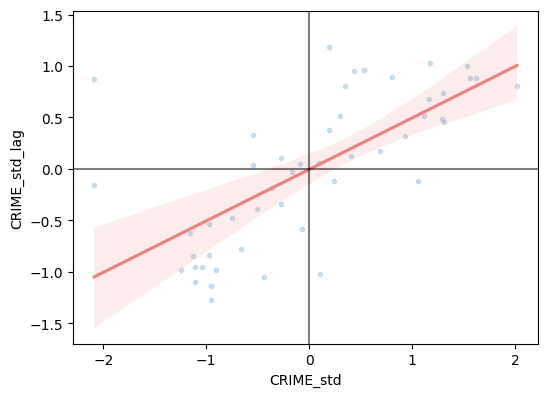

In [ ]:
f, ax = plt.subplots(1, figsize=(6, 6))
sns.regplot(
    x="CRIME_std",
    y="CRIME_std_lag",
    data=col,
    marker=".",
    scatter_kws={"alpha": 0.2},
    line_kws=dict(color="lightcoral")
)
ax.set_aspect('equal')
plt.axvline(0, c="black", alpha=0.5)
plt.axhline(0, c="black", alpha=0.5)
#plt.text(2.3, 2.7, "High-high", fontsize=10)
#plt.text(2.3, -2.7, "High-low", fontsize=10)
#plt.text(-4.4, 2.7, "Low-high", fontsize=10)
#plt.text(-4.4, -2.7, "Low-low", fontsize=10);

Text(8.827218469203908, 14.369076018912063, '0')

Text(8.332658372724923, 14.031624006323966, '1')

Text(9.0122654093717, 13.819719079969147, '2')

Text(8.460800893307436, 13.716962170228141, '3')

Text(9.007982127497685, 13.296366430537292, '4')

Text(9.739925828001203, 13.474632743210716, '5')

Text(8.118750060628729, 13.295703867053538, '6')

Text(8.496488171957548, 13.402612361972409, '7')

Text(9.630793442508981, 12.942724931765364, '8')

Text(10.366382709801057, 13.00188936025309, '9')

Text(8.669735412857046, 12.98012156123324, '10')

Text(8.544995589641779, 12.9531256839822, '11')

Text(8.349223482851055, 12.996094141102331, '12')

Text(8.292701516920957, 12.863707688216895, '13')

Text(8.973462206070094, 12.741586740380376, '14')

Text(8.655866335560422, 12.62731580875412, '15')

Text(10.528621192777077, 12.647475597059021, '16')

Text(8.487918125725194, 12.545342471590063, '17')

Text(8.312367703365632, 12.666720813263051, '18')

Text(10.190581526179413, 12.256899149288648, '19')

Text(7.847423618980444, 12.084997322022751, '20')

Text(9.655244367498366, 12.462765864102984, '21')

Text(10.671381108158549, 12.291571317666135, '22')

Text(8.420744068273082, 12.318013434287653, '23')

Text(8.938751825549426, 12.380509826386751, '24')

Text(9.250921130765516, 12.413783516339139, '25')

Text(9.737004148455055, 12.149692840219398, '26')

Text(9.297975780128176, 11.977787924704433, '27')

Text(8.977861502440566, 11.994012072407754, '28')

Text(8.68871949319255, 11.938718355531323, '29')

Text(6.8924823259937416, 11.914150957988443, '30')

Text(10.76378352110245, 11.844431047650396, '31')

Text(9.783876039871148, 11.922708164579584, '32')

Text(7.33943071762272, 11.628545121558876, '33')

Text(9.668248963690393, 11.692541207168867, '34')

Text(6.728837547719331, 11.634364976122036, '35')

Text(8.912362855719714, 11.630310543083501, '36')

Text(9.210527335403754, 11.659838850006437, '37')

Text(6.221942933898136, 11.402513578924117, '38')

Text(10.492492572016708, 11.507197282569432, '39')

Text(10.95358743637645, 11.479245868637376, '40')

Text(7.1100509053908985, 11.295438892865233, '41')

Text(9.214330280393483, 11.432771789368283, '42')

Text(9.641904437882928, 11.391036212262494, '43')

Text(8.910340473827835, 11.148639078569653, '44')

Text(6.423385031583336, 11.219238093398321, '45')

Text(10.935302271773978, 11.010030663664562, '46')

Text(9.251957402833792, 11.181253873699427, '47')

Text(9.492143530360028, 11.014961106511862, '48')

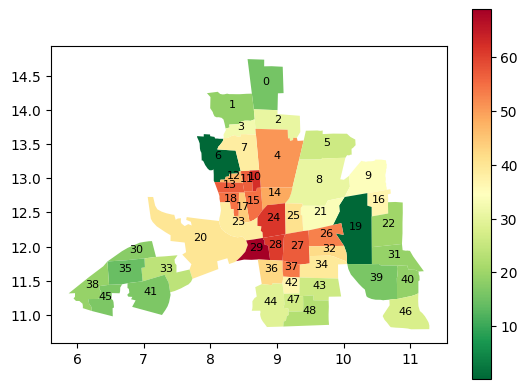

In [ ]:
ax=col.plot(column='CRIME',legend=True,cmap='RdYlGn_r') #,scheme='quantiles',k=5
for x, y, label in zip(colP.geometry.x, colP.geometry.y, colP.index):
    ax.annotate(label, xy=(x, y),horizontalalignment='center', fontsize=8) #ytext=(3, 3), textcoords="offset points"
#note be careful: double triple check, may be sometimes off depending on sorting, esp if not sorted on index: https://colab.research.google.com/github/theaok/vis/blob/main/all.ipynb#scrollTo=VVNjIKa67tJt

In [ ]:
col['index']=col.index
import plotly.express as px
px.scatter(col, x="CRIME_std", y="CRIME_std_lag", hover_data="index",width=1000,height=600)

eg top left #6: very low crime but neighbors hi crime

or #16 (0,-1):  avg crime but neighbors very low crime

In [ ]:
esda.Moran(col['CRIME'], contiguity_r).I

np.float64(0.5001885571828611)

In [ ]:
!pip install splot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.7/325.7 kB 23.3 MB/s eta 0:00:00


<Axes: >

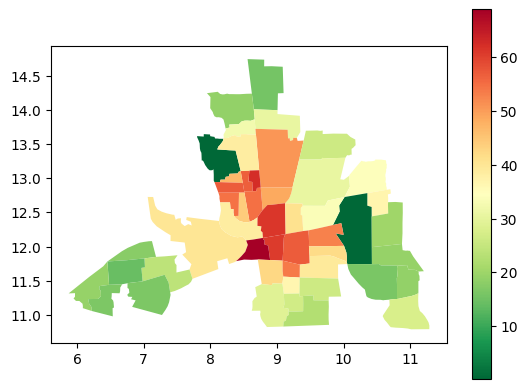

In [ ]:
col.plot(column='CRIME',legend=True,cmap='RdYlGn_r')

(<Figure size 640x480 with 1 Axes>, <Axes: >)

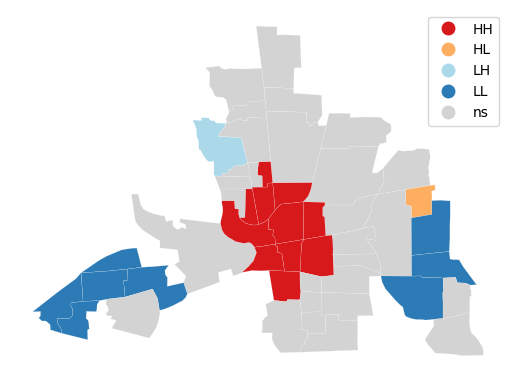

In [ ]:
from splot import esda as esdaplot
lisa = esda.Moran_Local(col['CRIME'], contiguity_r)
esdaplot.lisa_cluster(lisa,col)

(<Figure size 1500x400 with 3 Axes>,
 array([<Axes: title={'center': 'Moran Local Scatterplot'}, xlabel='Attribute', ylabel='Spatial Lag'>,
        <Axes: >, <Axes: >], dtype=object))

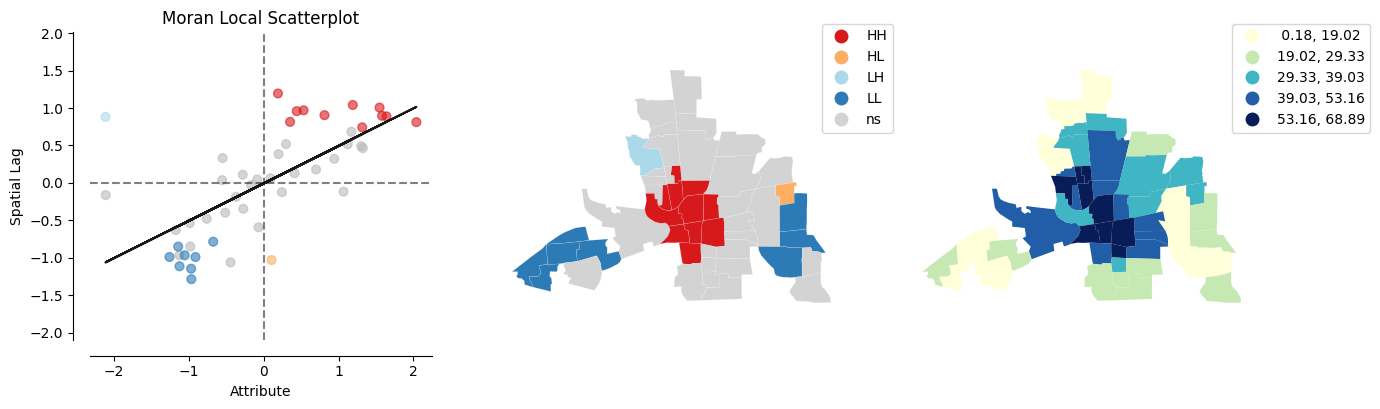

In [ ]:
from splot.esda import (
    moran_scatterplot, lisa_cluster, plot_local_autocorrelation
)
plot_local_autocorrelation(lisa, col, 'CRIME')
#aok: note the significant ones LL blue HH red in first panel are closer to 45degree imaginary line

In [ ]:
#again projection is off

#lisa.explore(
#  col,
#  crit_value=0.05,
#  prefer_canvas=True,
#  tiles="CartoDB Positron",
#)

#### nj munis ex LATER MAYBE

In [ ]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
m0=gpd.read_file('nj_munis.shp')
m = m0[m0['COUNTY'].isin(['ATLANTIC', 'CAPE MAY', 'CUMBERLAND','SALEM'])]
m = m.reset_index(drop=True)
mP = m.copy()
mP["geometry"] = m["geometry"].centroid

In [ ]:
m

,MUN,COUNTY,MUN_LABEL,MUN_TYPE,NAME,GNIS_NAME,GNIS,SSN,MUN_CODE,CENSUS2010,...,POP2000,POP1990,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,Shape_Leng,Shape_Area,geometry
0,CAPE MAY POINT BORO,CAPE MAY,Cape May Point Borough,Borough,Cape May Point Borough,Borough of Cape May Point,885179,0503,0503,3400910330,...,241,248,255,970,803,826,850,13419.410660,8.365715e+06,"POLYGON ((361324.555 36119.591, 361262.564 361..."
1,WEST CAPE MAY BORO,CAPE MAY,West Cape May Borough,Borough,West Cape May Borough,Borough of West Cape May,885435,0512,0512,3400978530,...,1095,1026,1091,868,926,868,923,27549.559037,3.295470e+07,"POLYGON ((371013.281 40519.688, 372330.802 395..."
2,CAPE MAY CITY,CAPE MAY,Cape May City,City,Cape May,City of Cape May,885178,0502,0502,3400910270,...,4034,4668,4853,1252,1399,1619,1684,62571.109085,8.036053e+07,"POLYGON ((385059.21 43411.44, 385135.71 43390...."
3,WILDWOOD CREST BORO,CAPE MAY,Wildwood Crest Borough,Borough,Wildwood Crest Borough,Borough of Wildwood Crest,885445,0515,0515,3400981200,...,3980,3631,4149,2209,2688,2452,2802,32569.219658,4.128281e+07,"POLYGON ((397386.178 55797.446, 397386.526 557..."
4,WEST WILDWOOD BORO,CAPE MAY,West Wildwood Borough,Borough,West Wildwood Borough,Borough of West Wildwood,885441,0513,0513,3400980210,...,448,453,360,1675,1231,1245,990,16515.541033,1.014253e+07,"POLYGON ((401502.81 61708.99, 401592.22 61615...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,FAIRFIELD TWP,CUMBERLAND,Fairfield Township,Township,Fairfield Township,Township of Fairfield,882059,0605,0605,3401122350,...,6283,5699,5693,145,144,131,131,260461.032637,1.211480e+09,"POLYGON ((297959.92 220723.83, 298035.31 22071..."
64,MAURICE RIVER TWP,CUMBERLAND,Maurice River Township,Township,Maurice River Township,Township of Maurice River,882063,0609,0609,3401144580,...,6928,6648,4577,84,73,70,48,347809.870851,2.653283e+09,"POLYGON ((388028.381 218741.598, 391570.584 21..."
65,PITTSGROVE TWP,SALEM,Pittsgrove Township,Township,Pittsgrove Township,Township of Pittsgrove,1729723,1710,1711,3403359130,...,8893,8121,6954,205,194,178,152,170991.476781,1.275207e+09,"POLYGON ((332483.8 264105.59, 332475.45 264098..."
66,GALLOWAY TWP,ATLANTIC,Galloway Township,Township,Galloway Township,Township of Galloway,882052,0111,0111,3400125560,...,31209,23330,12176,336,280,210,109,354937.882266,3.101498e+09,"POLYGON ((493687.67 264126.71, 493225.33 26377..."


Text(359809.43122612307, 38209.868163174644, 'CAPE MAY POINT BORO')

Text(367612.36259596836, 39970.68535253346, 'WEST CAPE MAY BORO')

Text(377448.09833471826, 39365.64312481855, 'CAPE MAY CITY')

Text(396151.8850274181, 50567.801014477496, 'WILDWOOD CREST BORO')

Text(400180.75528484356, 61081.584965773356, 'WEST WILDWOOD BORO')

Text(407613.1954263175, 63066.1506378555, 'NORTH WILDWOOD CITY')

Text(375991.7713980889, 54397.499096943524, 'LOWER TWP')

Text(415622.6672921384, 76204.65735833593, 'STONE HARBOR BORO')

Text(425105.5422976457, 93638.5021765932, 'AVALON BORO')

Text(397495.95869850385, 91815.7437145622, 'MIDDLE TWP')

Text(435909.8042201323, 116025.81237003102, 'SEA ISLE CITY')

Text(404419.61721333733, 144011.0478610065, 'WOODBINE BORO')

Text(401787.248254727, 134426.74518590156, 'DENNIS TWP')

Text(463517.32613076316, 158812.05430522148, 'OCEAN CITY')

Text(484296.12380937836, 174587.7205804175, 'LONGPORT BORO')

Text(427759.7948621208, 154032.66890321553, 'UPPER TWP')

Text(429912.8485357085, 171728.8533625579, 'CORBIN CITY')

Text(462198.1358970692, 176399.42524336284, 'SOMERS POINT CITY')

Text(490137.1649751483, 181238.52146990076, 'MARGATE CITY')

Text(339044.9988298991, 161475.4682744644, 'COMMERCIAL TWP')

Text(312971.38970791426, 160615.03152146222, 'DOWNE TWP')

Text(496080.9570684618, 186624.76720107457, 'VENTNOR CITY')

Text(472271.27723602636, 185777.90146430169, 'LINWOOD CITY')

Text(476776.3311423676, 196131.6470199208, 'NORTHFIELD CITY')

Text(297281.2097564755, 183341.26985075473, 'LAWRENCE TWP')

Text(505488.9403169186, 199048.11258285632, 'ATLANTIC CITY')

Text(247393.55424958086, 206038.6503509777, 'GREENWICH TWP')

Text(408518.05374922795, 212388.3472823047, 'WEYMOUTH TWP')

Text(414338.422746417, 191436.3838923169, 'ESTELL MANOR CITY')

Text(334976.5237308317, 203302.56531457696, 'MILLVILLE CITY')

Text(526417.6978605924, 211193.84149344062, 'BRIGANTINE CITY')

Text(286475.9211144856, 217606.2205785118, 'BRIDGETON CITY')

Text(267116.3740352208, 229059.79545892816, 'SHILOH BORO')

Text(312269.17815935385, 230378.50290700147, 'DEERFIELD TWP')

Text(272482.79519409896, 220704.61839133725, 'HOPEWELL TWP')

Text(366672.72197032906, 253389.0117588431, 'BUENA BORO')

Text(496291.8331848287, 254755.92045383985, 'PORT REPUBLIC CITY')

Text(224628.44061655365, 234504.76852421986, 'LOWER ALLOWAYS CREEK TWP')

Text(290134.720759174, 241280.4930841211, 'UPPER DEERFIELD TWP')

Text(351504.0088457575, 230539.95106858964, 'VINELAND CITY')

Text(210252.9228442063, 256843.6808624615, 'ELSINBORO TWP')

Text(242713.76537363537, 253998.24662517052, 'QUINTON TWP')

Text(218108.94086603518, 269006.10051601625, 'SALEM CITY')

Text(423471.73879088205, 240211.0955260734, 'HAMILTON TWP')

Text(382590.4478545495, 248503.78010817556, 'BUENA VISTA TWP')

Text(302180.5049557371, 276968.31692375074, 'ELMER BORO')

Text(261133.21800212443, 266132.4369923135, 'ALLOWAY TWP')

Text(395629.4829088381, 276810.93248622, 'FOLSOM BORO')

Text(259802.6861785203, 298610.06541551795, 'WOODSTOWN BORO')

Text(292076.4430466448, 284251.6758182349, 'UPPER PITTSGROVE TWP')

Text(232919.41072319107, 287369.6794197771, 'MANNINGTON TWP')

Text(208079.78982312555, 290284.18341486156, 'PENNSVILLE TWP')

Text(260847.5152716952, 300581.6808931982, 'PILESGROVE TWP')

Text(219587.06669973215, 327206.435970878, 'PENNS GROVE BORO')

Text(225564.4618545009, 315840.2084803782, 'CARNEYS POINT TWP')

Text(235847.60982017248, 330514.38417018746, 'OLDMANS TWP')

Text(493729.4704488614, 214659.10522402386, 'ABSECON CITY')

Text(487349.1650124451, 202727.91288977832, 'PLEASANTVILLE CITY')

Text(460938.7563438963, 198554.0785380307, 'EGG HARBOR TWP')

Text(465027.9926904179, 266119.9567202655, 'EGG HARBOR CITY')

Text(416722.0063519693, 300165.433229301, 'HAMMONTON TOWN')

Text(441263.7464527071, 279944.4183307556, 'MULLICA TWP')

Text(251350.43263965927, 227162.5980180722, 'STOW CREEK TWP')

Text(281508.2820227494, 197059.33912701515, 'FAIRFIELD TWP')

Text(368971.8757848984, 172331.16996509838, 'MAURICE RIVER TWP')

Text(314712.762870457, 258146.45099422842, 'PITTSGROVE TWP')

Text(498086.9966577457, 239621.9953381854, 'GALLOWAY TWP')

Text(401494.083355295, 56375.741640935514, 'WILDWOOD CITY')

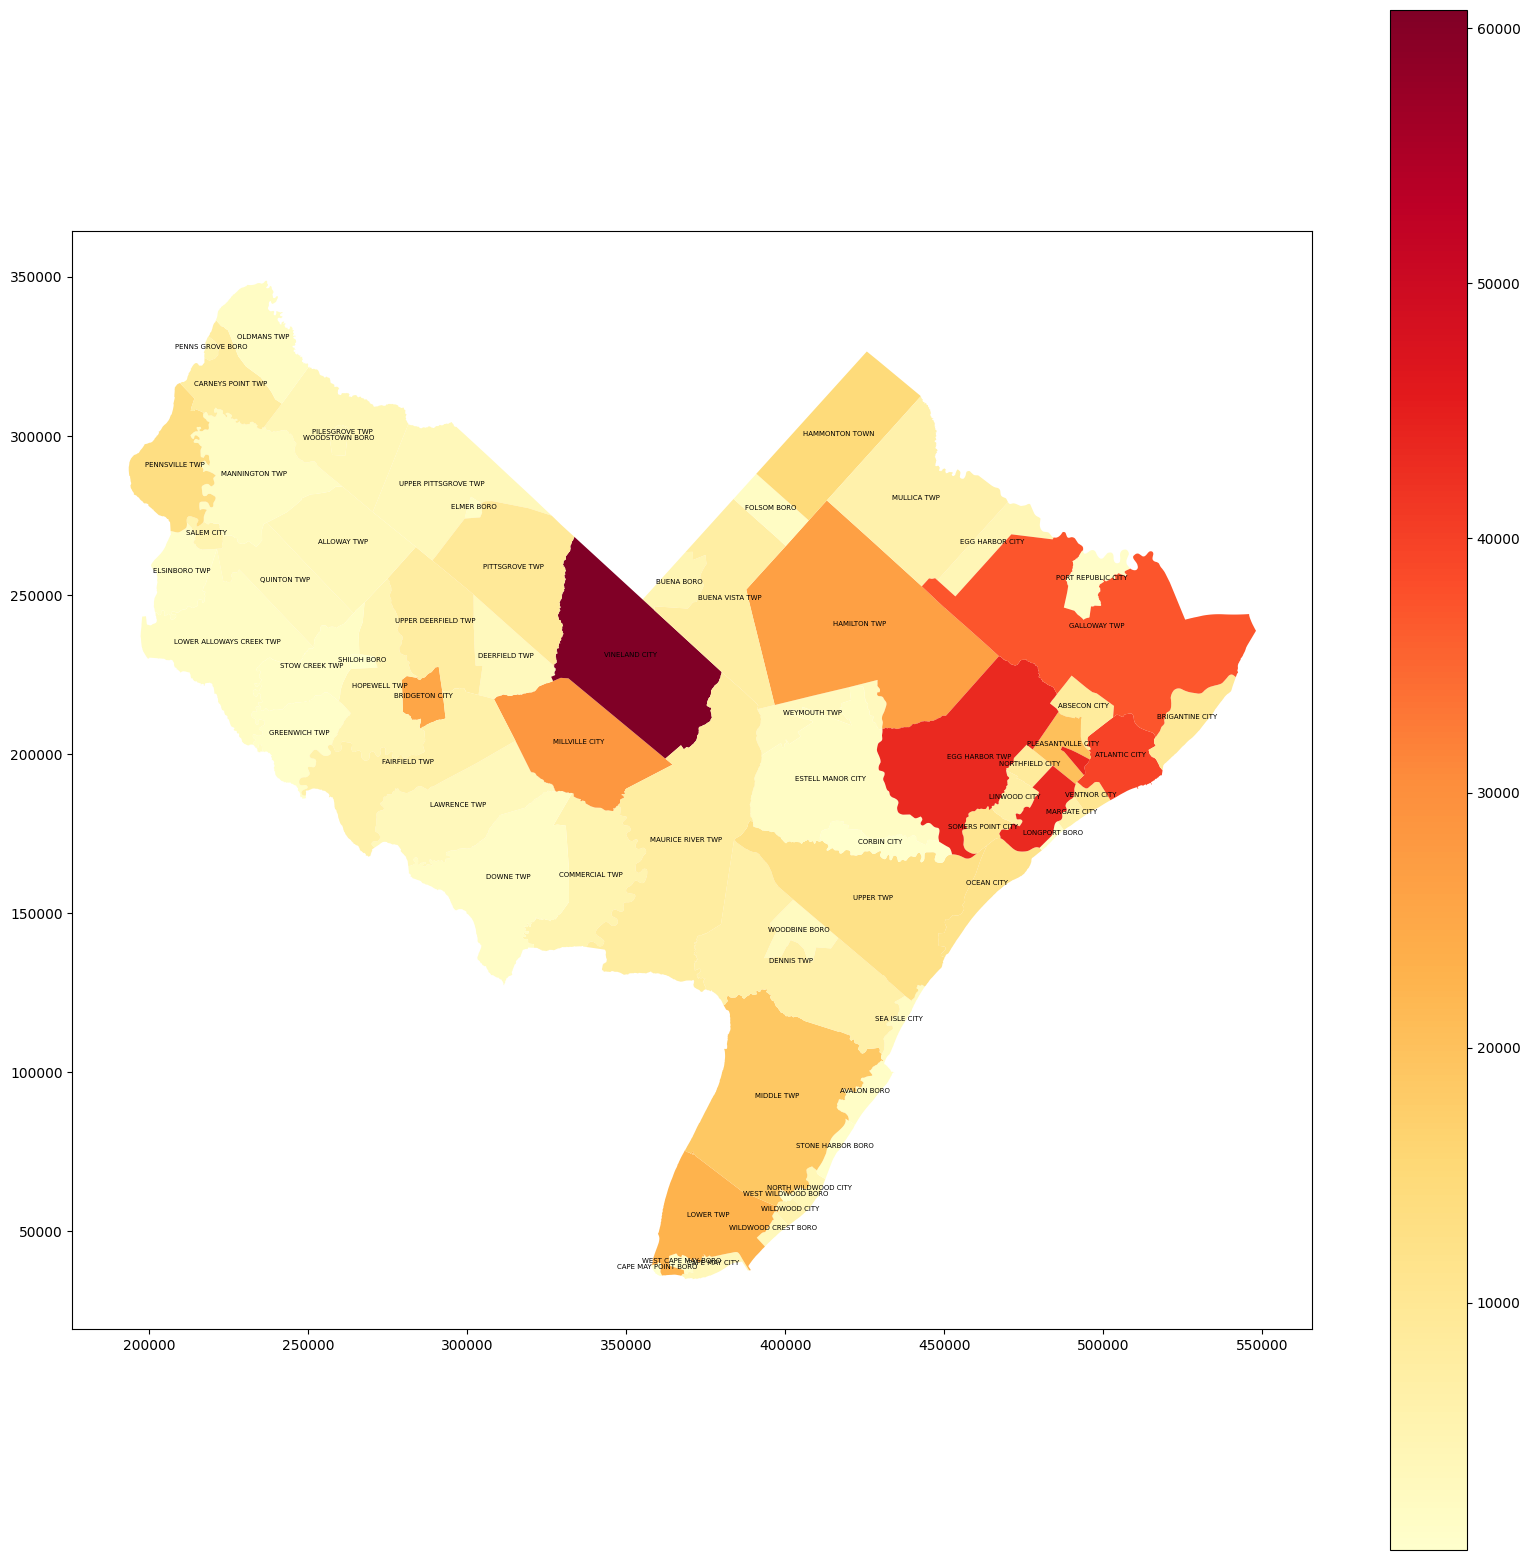

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
ax=m.plot(column='POP2010',legend=True,cmap='YlOrRd',ax=ax) #,scheme='quantiles',k=5
for x, y, label in zip(mP.geometry.x, mP.geometry.y, mP.MUN):
    ax.annotate(label, xy=(x, y),horizontalalignment='center', fontsize=5) #ytext=(3, 3), textcoords="offset points"
#note be careful: double triple check, may be sometimes off depending on sorting, esp if not sorted on index: https://colab.research.google.com/github/theaok/vis/blob/main/all.ipynb#scrollTo=VVNjIKa67tJt

#dead
what follows is unmaintained as of fall 2024; the reason is that pygeoda is dead as of 2021

pysal/esda code I put below I abandoned too; and developed from scratch above instead

### pygeoda

In [ ]:
!pip install pygeoda
# see its dead https://pypi.org/project/pygeoda/

In [ ]:
g_col = pygeoda.open(col)
queen_w = pygeoda.queen_weights(g_col)
queen_w

Weights Meta-data:
 number of observations:                   49
           is symmetric:                 True
               sparsity:   0.0982923781757601
        # min neighbors:                    2
        # max neighbors:                   10
       # mean neighbors:    4.816326530612245
     # median neighbors:                  4.0
           has isolates:                False

In [ ]:
queen_w.get_neighbors(0)

(1, 2)

In [ ]:
queen_w.get_neighbors(1)

(0, 2, 3)

In [ ]:
col['CRIME'][0] #going back to 1st example--0 has crime of:

15.72598

In [ ]:
#and its 2 neighbors:
col['CRIME'][1]
print('')
col['CRIME'][2]

18.801754

30.626781

In [ ]:
#so queen spatially lagged crime for 0 is the average of its 2 neighbors:
(col['CRIME'][1]+col['CRIME'][2])/2

24.7142675

In [ ]:
queen_w.spatial_lag(col['CRIME'])[0] #yay; and more functions: https://geodacenter.github.io/pygeoda/spatial_weights.html#queen-contiguity-weights

24.7142675

In [ ]:
#import numpy as np #TODO: not sure about this! there must be fucntion to calc it plus slides say its .5, not .7
#np.corrcoef(col['CRIME'], queen_w.spatial_lag(col['CRIME']))

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

[Text(0.5, 1.0, 'Local Moran Cluster Map of Crm_prp\n Population per Crime against persons')]

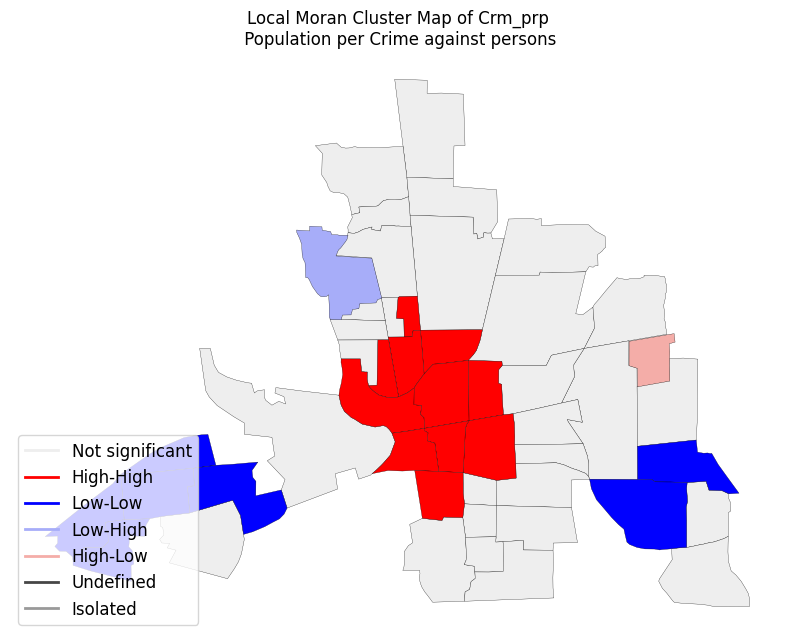

In [ ]:
#https://geodacenter.github.io/pygeoda/esda_geopandas.html#geopandas-pygeoda

crm_prp = col['CRIME']
crm_lisa = pygeoda.local_moran(queen_w, crm_prp)

import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,10))
lisa_colors = crm_lisa.lisa_colors()
lisa_labels = crm_lisa.lisa_labels()

# attach LISA cluster indicators to geodataframe
col['LISA'] = crm_lisa.lisa_clusters()

for ctype, data in col.groupby('LISA'):
    color = lisa_colors[ctype]
    lbl = lisa_labels[ctype]
    data.plot(color = color,
        ax = ax,
        label = lbl,
        edgecolor = 'black',
        linewidth = 0.2)

# Place legend in the lower right hand corner of the plot
lisa_legend = [matplotlib.lines.Line2D([0], [0], color=color, lw=2) for color in lisa_colors]
ax.legend(lisa_legend, lisa_labels,loc='lower left', fontsize=12, frameon=True)
ax.set(title='Local Moran Cluster Map of crime')
ax.set_axis_off()

### pysal / esda

https://github.com/pysal/esda/

In [ ]:
!pip install libpysal
!pip install esda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 2.9 MB/s eta 0:00:00


In [ ]:
import libpysal as lps
import esda

In [ ]:
#https://github.com/pysal/esda/blob/main/notebooks/Spatial%20Autocorrelation%20for%20Areal%20Unit%20Data.ipynb
wq =  lps.weights.Queen.from_dataframe(col)
wq.transform = 'r'

<ipython-input-14-8fcd70f9a717>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq =  lps.weights.Queen.from_dataframe(col)


In [ ]:
y = col['CRIME']
ylag = lps.weights.lag_spatial(wq, y)

In [ ]:
#np.corrcoef(y,ylag) #ah ok again same thing

In [ ]:
mi = esda.moran.Moran(y, wq) #ha so now we got .5 as the slides say
mi.I

0.5001885571828611

### TODO

#### fa24

add point pattern etc from https://geographicdata.science/book

#### 23
have old fashioned geoda run this stuff and make sure we are good! maybe already at bsb134 or library or some classroom